<a href="https://colab.research.google.com/github/gnurtqh/sentiment-classification/blob/main/CMU_MOSEI_analysis_%D0%A5%D0%BE_%D0%9A%D1%83%D0%B0%D0%BD%D0%B3_%D0%A7%D1%83%D0%BD%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧩 Эксполаторный анализ корпуса

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Импорт библиотек

In [8]:
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os

**Скачать необходимые пакеты**

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Загрузка корпуса данных

**Путь к каталогу**

In [10]:
home_path = "/content/drive/MyDrive/Курс Работа - Автоматическийанализ эмоций"

In [11]:
base_folder = os.path.join(home_path, 'CMU-MOSEI')

**Загрузка наборов меток данных**

In [12]:
train_labels = pd.read_csv(os.path.join(base_folder, "Labels/Data_Train_modified.csv"))
val_labels = pd.read_csv(os.path.join(base_folder, "Labels/Data_Val_modified.csv"))
test_labels = pd.read_csv(os.path.join(base_folder, "Labels/Data_Test_modified.csv"))

## Анализ корпуса данных

**Просмотр содержимого корпуса**

In [13]:
train_labels.head()

,video,start_time,end_time,sentiment,happy,sad,anger,surprise,disgust,fear,text,ASR
0,-3g5yACwYnA,82.7645,100.5550,1.000000,0.666667,0.666667,0.0,0.0,0.0,0.666667,Key is part of the people that we use to solve...,key part of the people that we use the to sel...
1,-3g5yACwYnA,119.9190,125.2990,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.000000,They've been able to find solutions or at leas...,is that we do they have been able to find sol...
2,-3g5yACwYnA,4.8400,13.6315,0.000000,0.666667,0.666667,0.0,0.0,0.0,0.333333,Key Polymer brings a technical aspect to our o...,creations and key brings a keep our brains ar...
3,-3g5yACwYnA,13.6315,27.0310,0.000000,0.333333,0.333333,0.0,0.0,0.0,0.000000,We're a huge user of adhesives for our operati...,we are a huge a user of adhesives for our ope...
4,-3g5yACwYnA,27.0310,41.3000,1.000000,0.666667,0.000000,0.0,0.0,0.0,0.000000,Key brings those types of aspects to a busines...,he brings those types of a aspects to our bus...


In [14]:
val_labels.head()

,video,start_time,end_time,sentiment,happy,sad,anger,surprise,disgust,fear,text,ASR
0,--qXJuDtHPw,23.199,30.325,1.000000,0.666667,0.000000,0.0,0.0,0.0,0.0,I see that a writer is somebody who has an inc...,peter and i see that a writer is somebody who...
1,-571d8cVauQ,0.000,4.992,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,"This is Rhett Reiger, White Caspian Studios on...",this is red ryder white caspian studios on be...
2,-571d8cVauQ,21.842,28.309,-0.666667,0.333333,0.333333,0.0,0.0,0.0,0.0,"However, again on a low budget film there's no...",however again on a low budget film there's no...
3,-571d8cVauQ,69.893,85.000,0.333333,0.333333,0.000000,0.0,0.0,0.0,0.0,"So very important to go out to the locations, ...",was so very important to go out to the locati...
4,-I_e4mIh0yE,3.144,10.570,-0.666667,0.000000,0.333333,0.0,0.0,0.0,0.0,In the United States we don't punish failure t...,the ship in the united states we don't punish...


In [15]:
test_labels.head()

,video,start_time,end_time,sentiment,happy,sad,anger,surprise,disgust,fear,text,ASR
0,-6rXp3zJ3kc,14.468,22.8820,0.000000,0.000000,0.333333,0.333333,0.0,0.0,0.0,And it's a retirement future that can ultimate...,and it's a retirement future that ultimately ...
1,-6rXp3zJ3kc,45.428,58.1300,-1.000000,0.000000,0.333333,0.000000,0.0,0.0,0.0,Many people are not until they get to be a old...,aware of many people are not until i get to b...
2,-6rXp3zJ3kc,58.130,71.9600,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.0,"So the answer to the question, can I contribut...",so the answer to the question can i contribut...
3,-9y-fZ3swSY,0.000,6.3680,1.000000,1.333333,0.000000,0.000000,0.0,0.0,0.0,"is, you can say, hey I really like baby skin, ...",especially if i'd say hey can what i really l...
4,-9y-fZ3swSY,6.368,11.7855,1.333333,1.000000,0.000000,0.000000,0.0,0.0,0.0,"It’s so nice, by giving a good example and not...",it's so nice by giving a good example and not...


> Все 3 набора обучающих данных, данных проверки и тестовых данных включают следующие столбцы:
> - video: название видео/аудио файла
> - start_time, end_time: время начала и окончания сегмента аудиофайла
> - sentiment: уровень сентимента сегмента аудиофайла
> - happy, sad, anger, surprise, disgust, fear: 
> - text: содержимое сегмента аудиофайла
> - ASR: содержимое сегмента аудиофайла, обнаруженное с помощью asr

**Размер наборов данных**

In [16]:
print("Train data size:", train_labels.shape)
print("Val data size:", val_labels.shape)
print("Test data size:", test_labels.shape)

Train data size: (16274, 12)
Val data size: (1861, 12)
Test data size: (4653, 12)


> Наборы данных разделены в соотношении 16274|1861|4653 ~ 71.4%|8.2%|20.4%

**Количество уникальных значений столбцов**

In [17]:
train_labels.nunique(axis=0)

video          2244
start_time    13762
end_time      14490
sentiment        27
happy            14
sad              15
anger            12
surprise         12
disgust          11
fear              7
text          16160
ASR           16117
dtype: int64

In [18]:
val_labels.nunique(axis=0)

video          298
start_time    1703
end_time      1814
sentiment       25
happy           14
sad             10
anger            8
surprise         9
disgust          9
fear             6
text          1859
ASR           1853
dtype: int64

In [19]:
test_labels.nunique(axis=0)

video          675
start_time    4246
end_time      4499
sentiment       23
happy           12
sad             10
anger           10
surprise         6
disgust         11
fear             5
text          4640
ASR           4633
dtype: int64

**Добавляем столбцы длины аудио и длины текста**

In [20]:
train_labels["duration"] = train_labels["end_time"]-train_labels["start_time"]
train_labels["text_length"] = train_labels["ASR"].apply(lambda x: len(x.split()))

In [21]:
val_labels["duration"] = val_labels["end_time"]-val_labels["start_time"]
val_labels["text_length"] = val_labels["ASR"].apply(lambda x: len(x.split()))

In [22]:
test_labels["duration"] = test_labels["end_time"]-test_labels["start_time"]
test_labels["text_length"] = test_labels["ASR"].apply(lambda x: len(x.split()))

**Основная статистика набора данных**



In [23]:
train_labels.drop(['start_time', 'end_time'], axis=1).describe() 

,sentiment,happy,sad,anger,surprise,disgust,fear,duration,text_length
count,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000
mean,0.145406,0.486768,0.161259,0.158166,0.048943,0.124667,0.040494,7.164530,19.845275
std,1.125372,0.640150,0.331518,0.367820,0.172161,0.327609,0.151935,5.060833,13.820758
min,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189500,0.000000
25%,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.906031,11.000000
50%,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,6.021500,17.000000
75%,1.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,9.080374,25.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.666667,108.928571,311.000000


In [24]:
val_labels.drop(['start_time', 'end_time'], axis=1).describe() 

,sentiment,happy,sad,anger,surprise,disgust,fear,duration,text_length
count,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000
mean,0.191922,0.440265,0.167562,0.122336,0.049704,0.090095,0.043794,7.580136,20.671682
std,1.038515,0.579338,0.327045,0.304323,0.164479,0.263585,0.152660,4.951050,13.905139
min,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.349000,1.000000
25%,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.469841,12.000000
50%,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,6.624943,18.000000
75%,0.666667,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,9.599500,26.000000
max,3.000000,3.000000,3.000000,2.333333,1.666667,2.666667,1.000000,91.684000,279.000000


In [25]:
test_labels.drop(['start_time', 'end_time'], axis=1).describe() 

,sentiment,happy,sad,anger,surprise,disgust,fear,duration,text_length
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,0.142883,0.470234,0.144674,0.163479,0.044058,0.117379,0.042696,7.388835,20.132818
std,1.109890,0.607638,0.302660,0.360687,0.155756,0.317113,0.156517,5.222004,14.117931
min,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176000,0.000000
25%,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.086000,11.000000
50%,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,6.251000,17.000000
75%,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,9.179138,25.000000
max,3.000000,3.000000,2.333333,3.000000,2.333333,3.000000,1.333333,104.393500,305.000000


**Распределение длительности сегмента аудиофайла**

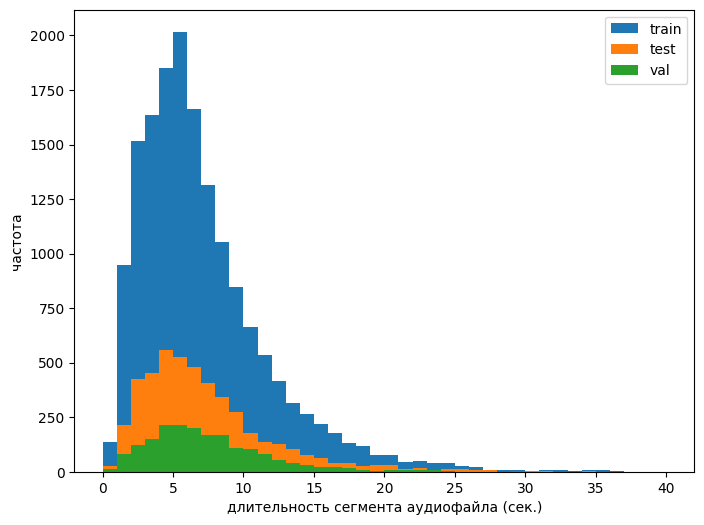

In [26]:
train_labels["duration"].plot(kind='hist', bins=40, range=(0, 40), label="train")
test_labels["duration"].plot(kind='hist', bins=40, range=(0, 40), label="test")
val_labels["duration"].plot(kind='hist', bins=40, range=(0, 40), label="val")
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.xlabel("длительность сегмента аудиофайла (сек.)")
plt.ylabel("частота")
plt.legend()
plt.show()

**Распределение длительности текста**

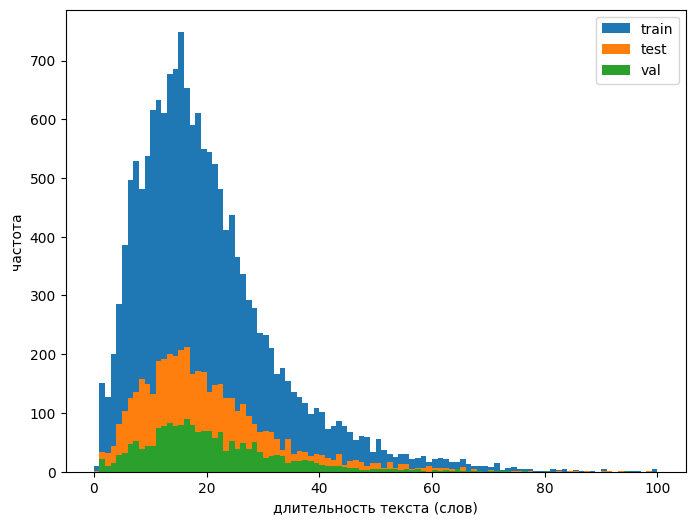

In [27]:
train_labels["text_length"].plot(kind='hist', bins=100, range=(0, 100), label="train")
test_labels["text_length"].plot(kind='hist', bins=100, range=(0, 100), label="test")
val_labels["text_length"].plot(kind='hist', bins=100, range=(0, 100), label="val")
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.xlabel("длительность текста (слов)")
plt.ylabel("частота")
plt.legend()
plt.show()

**Распределение сентимента**

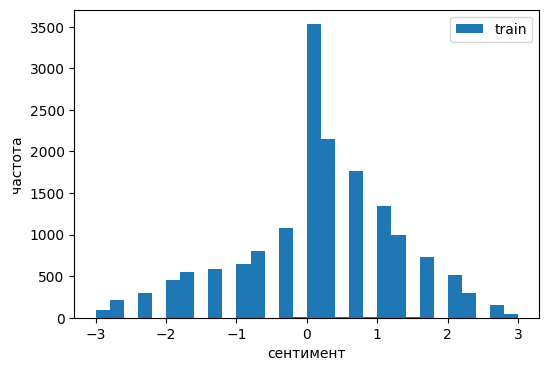

In [28]:
train_labels["sentiment"].plot(kind='hist', bins=30, label="train")
# test_labels["sentiment"].plot(kind='hist', bins=10, label="test")
# val_labels["sentiment"].plot(kind='hist', bins=10, label="val")
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.xlabel("сентимент")
plt.ylabel("частота")
plt.legend()
plt.show()

**Распределение значений эмоций**

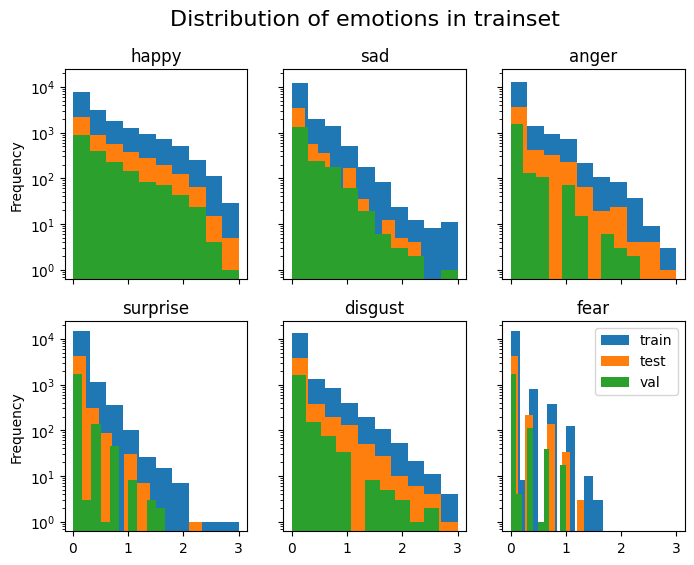

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 6), 
                        sharey=True, sharex=True, 
                        gridspec_kw={'wspace':0.2, 'hspace':0.2},
                        num='Histogram of emotions')
emotions = ['happy', 'sad', 'anger', 'surprise', 'disgust', 'fear']
for i, ax in enumerate(axs.flat):
    train_labels[emotions[i]].plot(kind='hist', ax=ax, label="train", title=emotions[i])
    test_labels[emotions[i]].plot(kind='hist', ax=ax, label="test", title=emotions[i])
    val_labels[emotions[i]].plot(kind='hist', ax=ax, label="val", title=emotions[i])
    ax.title.set_size(12)
    ax.set_yscale('log')
fig.suptitle('Distribution of emotions in trainset', fontsize=16)
plt.legend()

plt.show()

**Корреляция между столбцами данных**

<ipython-input-30-2d43bb4aeff3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_labels.drop(["start_time","end_time"], axis=1).corr()


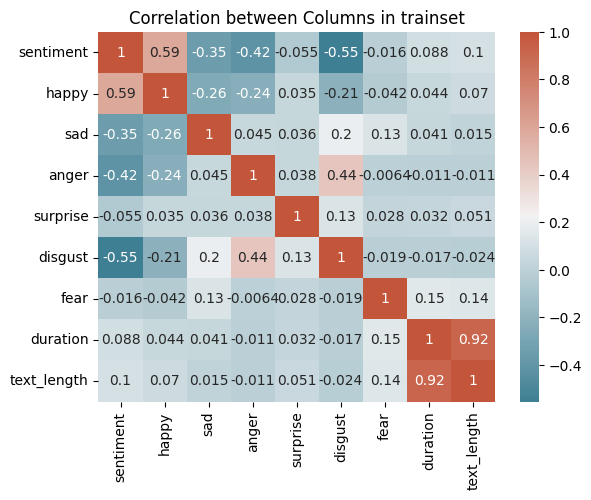

In [30]:
corr = train_labels.drop(["start_time","end_time"], axis=1).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True ))
plt.title("Correlation between Columns in trainset")
plt.show()

<ipython-input-31-7e505fead3cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = val_labels.drop(["start_time","end_time"], axis=1).corr()


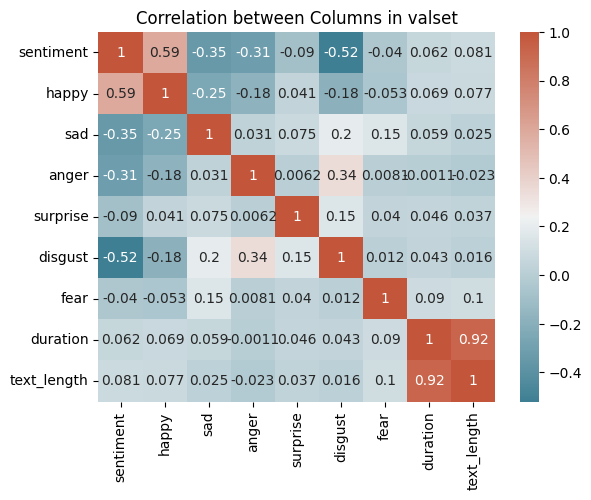

In [31]:
corr = val_labels.drop(["start_time","end_time"], axis=1).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True ))
plt.title("Correlation between Columns in valset")
plt.show()

<ipython-input-32-566fef49dad6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = test_labels.drop(["start_time","end_time"], axis=1).corr()


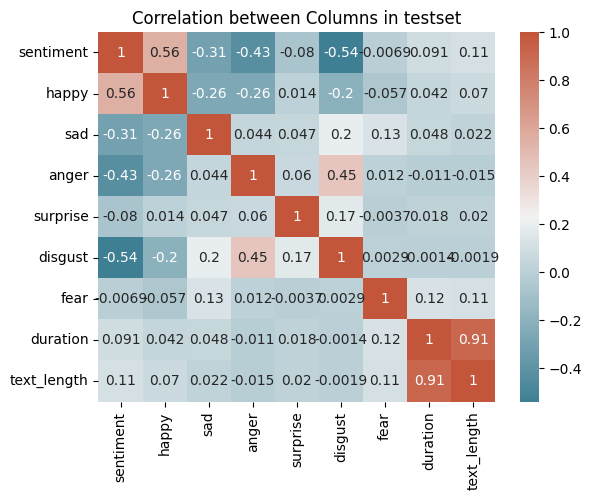

In [32]:
corr = test_labels.drop(["start_time","end_time"], axis=1).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True ))
plt.title("Correlation between Columns in testset")
plt.show()

# 🅱️ Baseline

> Построим классификатор сентимента (2 класса)

## ⚙️ Подготовка

In [33]:
from gensim.models import Word2Vec
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import os
import librosa
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import pickle
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Создаем новые метки для сентимента

In [34]:
def new_sentiment(x):
  if x < 0: 
    return 1 # негативный
  else:
    return 0 # без негативного

In [35]:
train_labels['sentiment2'] = train_labels['sentiment'].apply(new_sentiment)
val_labels['sentiment2'] = val_labels['sentiment'].apply(new_sentiment)
test_labels['sentiment2'] = test_labels['sentiment'].apply(new_sentiment)

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [37]:
random_state = 42

def set_random_state(random_state=0):
    """Initialize random generators.

    Parameters
    ==========
    random_state : int = 0
        Determines random number generation for centroid initialization.
        Use an int to make the randomness deterministic.
    """
    torch.manual_seed(random_state)
    random.seed(random_state)
    np.random.seed(random_state)

    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(random_state)
        torch.cuda.manual_seed(random_state)

        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

In [38]:
torch.use_deterministic_algorithms(True)

In [39]:
%env CUBLAS_WORKSPACE_CONFIG=:4096:8
%env PYTHONHASHSEED=42

env: CUBLAS_WORKSPACE_CONFIG=:4096:8
env: PYTHONHASHSEED=42


### Архитектура сети

In [140]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_dim).to(x.device)

        lstm_out, _ = self.lstm(x, (h0, c0))
        out = self.fc(lstm_out[:, -1, :])
        out = torch.sigmoid(out)
        return out

### Функции для обучения и предсказания

In [151]:
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    y_true = []
    y_pred = []
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1).float())
        loss.backward()
        optimizer.step()
        # calculate F1-score
        predicted = torch.round(outputs.data)
        y_true += targets.cpu().numpy().tolist()
        y_pred += predicted.cpu().numpy().tolist()

        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_acc_score = accuracy_score(y_true, y_pred)
    train_f1_score = f1_score(y_true, y_pred, average='macro')
    return train_loss, train_acc_score, train_f1_score

In [149]:
def evaluate(model, test_loader, criterion, device, set="test"):
    model.eval()
    running_loss = 0.0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(test_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1).float())

            # calculate F1-score
            predicted = torch.round(outputs.data)
            y_true += targets.cpu().numpy().tolist()
            y_pred += predicted.cpu().numpy().tolist()

            running_loss += loss.item()

    test_loss = running_loss / len(test_loader)
    test_acc_score = accuracy_score(y_true, y_pred)
    test_f1_score = f1_score(y_true, y_pred, average='macro')
    return test_loss, test_acc_score, test_f1_score

## 🔤 Извлечение признаков для текстов

### Токенизация

In [105]:
lemmatizer = WordNetLemmatizer()
def preprocess_sentence(sentence):
  words = sentence.strip().split()
  words = [lemmatizer.lemmatize(word) for word in words]
  return words

In [106]:
train_labels["tokens"] = train_labels["ASR"].apply(preprocess_sentence)
val_labels["tokens"] = val_labels["ASR"].apply(preprocess_sentence)
test_labels["tokens"] = test_labels["ASR"].apply(preprocess_sentence)

In [107]:
train_labels["tokens"]

0        [key, part, of, the, people, that, we, use, th...
1        [is, that, we, do, they, have, been, able, to,...
2        [creation, and, key, brings, a, keep, our, bra...
3        [we, are, a, huge, a, user, of, adhesive, for,...
4        [he, brings, those, type, of, a, aspect, to, o...
                               ...                        
16269                               [i, do, all, of, that]
16270    [i, read, other, article, will, other, trainer...
16271    [i, actually, speak, to, the, expert, myself, ...
16272    [now, if, this, sound, like, something, you're...
16273    [epic, retailer, and, we've, seen, some, progr...
Name: tokens, Length: 16274, dtype: object

### Векторизация

In [108]:
w2v_model = Word2Vec(train_labels["tokens"], vector_size=300, window=5, min_count=3, workers=4)

In [109]:
w2v_model.build_vocab(train_labels["tokens"])
w2v_model.train(train_labels["tokens"], total_examples=w2v_model.corpus_count, epochs=300, report_delay=1)

(67054807, 96888600)

In [110]:
def padding_sentence(sentence, seq_length, value):
    while len(sentence) < seq_length:
        sentence.append(np.zeros(300 ,dtype=np.float32))
    else:
        return sentence[:seq_length]

In [111]:
def get_vector(word_vectors, sentence):
    vector = []
    for word in sentence:
        if word in word_vectors:
            vector.append(word_vectors[word])
    return vector

In [112]:
train_vector = [get_vector(w2v_model.wv, sentence) for sentence in train_labels["tokens"]]
val_vector = [get_vector(w2v_model.wv, sentence) for sentence in val_labels["tokens"]]
test_vector = [get_vector(w2v_model.wv, sentence) for sentence in test_labels["tokens"]]

In [113]:
X_train = np.array([padding_sentence(i, 40, 0) for i in train_vector])
X_val = np.array([padding_sentence(i, 40, 0) for i in val_vector])
X_test = np.array([padding_sentence(i, 40, 0) for i in test_vector])

In [114]:
X_train.shape

(16274, 40, 300)

In [115]:
def new_sentiment(x):
  if x > 0: 
    return 0
  else:
    return 1

In [116]:
y_train = train_labels["sentiment2"]
y_val = val_labels["sentiment2"]
y_test = test_labels["sentiment2"]

In [117]:
y_train.shape

(16274,)

### Преобразование в тензоры

In [118]:
inputs_train =  torch.tensor(X_train)
targets_train = torch.IntTensor(y_train.to_numpy())

inputs_val = torch.tensor(X_val)
targets_val = torch.IntTensor(y_val.to_numpy())

inputs_test =  torch.tensor(X_test)
targets_test = torch.IntTensor(y_test.to_numpy())

trainset = torch.utils.data.TensorDataset(inputs_train,targets_train)
valset = torch.utils.data.TensorDataset(inputs_val, targets_val)
testset = torch.utils.data.TensorDataset(inputs_test, targets_test)

train_loader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size=64,shuffle=False)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64,shuffle=False)

## 📢 Извлечение признаков для аудио

### Пути к каталогам и файлам

In [119]:
audio_path = os.path.join(base_folder, "Audio_chunk")

In [120]:
train_audio_path = os.path.join(audio_path, "Train_modified")
val_audio_path = os.path.join(audio_path, "Val_modified")
test_audio_path = os.path.join(audio_path, "Test_modified")

In [121]:
def get_file_name(video, start_time, end_time):
    
    # Generate filename from label corresponding to audio files

    formatted_start_time = "{:.4f}".format(start_time)
    formatted_end_time = "{:.4f}".format(end_time)
    return f"{video}_{formatted_start_time}_{formatted_end_time}.wav"

In [122]:
train_labels['filename'] = train_labels.apply(lambda x: get_file_name(x['video'], x['start_time'], x['end_time']), axis=1)
val_labels['filename'] = val_labels.apply(lambda x: get_file_name(x['video'], x['start_time'], x['end_time']), axis=1)
test_labels['filename'] = test_labels.apply(lambda x: get_file_name(x['video'], x['start_time'], x['end_time']), axis=1)

### Извлечение признаков

In [123]:
def extract_features(df, audio_folder_path, features_file_path):
    """
    Extracts Mel Spectrogram features from the audio files in the dataframe
    and saves them to a numpy file.

    Args:
    - df (Pandas dataframe): A dataframe containing the audio file path and the corresponding label (0 or 1)
    - audio_folder_path (str): The folder path to load audio files
    - features_file_path (str): The file path to save the extracted features to.

    Returns:
    None
    """

    # Initialize empty list to store features and labels
    data = []

    # Loop through each row in the dataframe
    for i, row in tqdm(df.iterrows()):
        # Load the audio file using librosa
        y, sr = librosa.load(os.path.join(audio_folder_path, row['filename']), sr=16000, mono=True)
        # Extract the Mel Spectrogram features using librosa
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
        log_S = librosa.power_to_db(S, ref=np.max)
        norm_S = (log_S - log_S.min()) / (log_S.max() - log_S.min())

        # Create dictionary containing the feature and label
        sample = {'feature': norm_S, 'label': row['sentiment2']}

        # Append the sample to the data list
        data.append(sample)

    # Save the data list to a file
    pickle.dump(data, open(features_file_path, 'wb'))


In [124]:
# extract_features(train_labels, train_audio_path, os.path.join(home_path, 'train'))

In [125]:
# extract_features(val_labels, val_audio_path, os.path.join(home_path, 'val'))

In [126]:
# extract_features(test_labels, test_audio_path, os.path.join(home_path, 'test'))

In [127]:
train_data = pickle.load(open(os.path.join(home_path, 'train'), "rb"))
val_data = pickle.load(open(os.path.join(home_path, 'val'), "rb"))
test_data = pickle.load(open(os.path.join(home_path, 'test'), "rb"))

In [128]:
def remove_nan(data):
    newdata = [row for row in data if not np.isnan(row["feature"]).any()]
    return newdata

In [129]:
train_data = pd.DataFrame(remove_nan(train_data))
val_data = pd.DataFrame(remove_nan(val_data))
test_data = pd.DataFrame(remove_nan(test_data))

### Построение датасетов

> выберем длительность аудио 32 с

**Количество кадров для 32-секундного аудио:**
sr x 32 / hop_length = 16000 x 32 / 512 = 1000

In [130]:
class AudioDataset(Dataset):
    def __init__(self, x, y=None):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        x = self.prepare_shape(self.x[idx])
        x = torch.from_numpy(x).float()
        x = x.squeeze(2)
        if self.y is not None:
            return x,\
                torch.tensor(self.y[idx])
        return x

    def prepare_shape(self, feature):
        N = 1000
        if feature.shape[1] >= N:
            start_idx = np.random.randint(0, feature.shape[1] - N + 1)
            feature = feature[:, start_idx:start_idx + N]
        else:
            while feature.shape[1] < N:
                feature = np.hstack((feature, feature))
            feature = feature[:, :N]
        feature = feature[np.newaxis, :, :]
        return np.transpose(feature)

In [131]:
train_audio_dset = AudioDataset(train_data['feature'], train_data['label'])
val_audio_dset = AudioDataset(val_data['feature'], val_data['label'])
test_audio_dset = AudioDataset(test_data['feature'], test_data['label'])

In [132]:
train_audio_loader = DataLoader(train_audio_dset, batch_size=64, shuffle=True)
val_audio_loader = DataLoader(val_audio_dset, batch_size=64, shuffle=False)
test_audio_loader = DataLoader(test_audio_dset, batch_size=64, shuffle=False)

## 🎯 Эксперименты

In [141]:
def run(train_loader, val_loader, input_dim, hidden_dim, optimizer, n_epochs):
  model = LSTMClassifier(input_dim, hidden_dim).to(device)
  optimizer = optimizer(model.parameters())
  loss_fn = F.binary_cross_entropy
  acc = {"train": [], "val":[]}
  loss = {"train":[], "val":[]}
  f1 = {"train":[], "val":[]}
  for t in tqdm(range(n_epochs)):
      train_loss, train_acc, train_f1 = train(model, train_loader, optimizer, loss_fn, device)
      val_loss, val_acc, val_f1 = evaluate(model, val_loader, loss_fn, device, 'val')
      acc["train"].append(train_acc)
      f1["train"].append(train_f1)
      loss["train"].append(train_loss)
      acc["val"].append(val_acc)
      f1["val"].append(val_f1)
      loss["val"].append(val_loss)
  return acc, loss, f1

In [142]:
def draw_learning_curve(acc, loss, f1):
  plt.plot(loss['train'], label='Training loss')
  plt.plot(loss['val'], label='Validation loss')
  plt.legend()
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

  plt.plot(acc['train'], label='Training accuracy')
  plt.plot(acc['val'], label='Validation accuracy')
  plt.legend()
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.show()

  plt.plot(f1['train'], label='Training f1')
  plt.plot(f1['val'], label='Validation f1')
  plt.legend()
  plt.title('Training and Validation f1')
  plt.xlabel('Epoch')
  plt.ylabel('F1')
  plt.show()

100%|██████████| 50/50 [01:45<00:00,  2.11s/it]


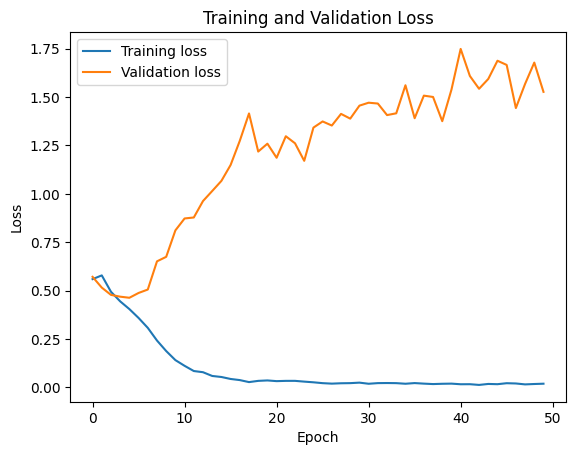

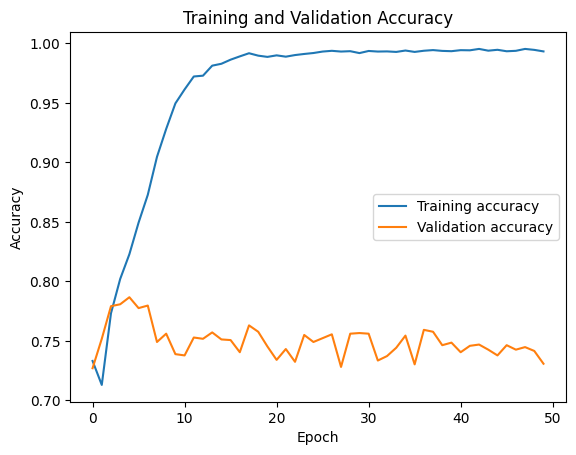

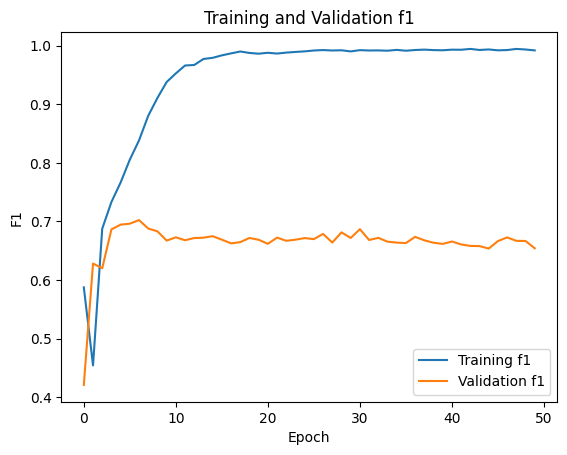

In [152]:
acc, loss, f1 = run(train_loader, val_loader, 300, 300, optim.Adam, 20)
draw_learning_curve(acc, loss, f1)

100%|██████████| 100/100 [19:44<00:00, 11.84s/it]


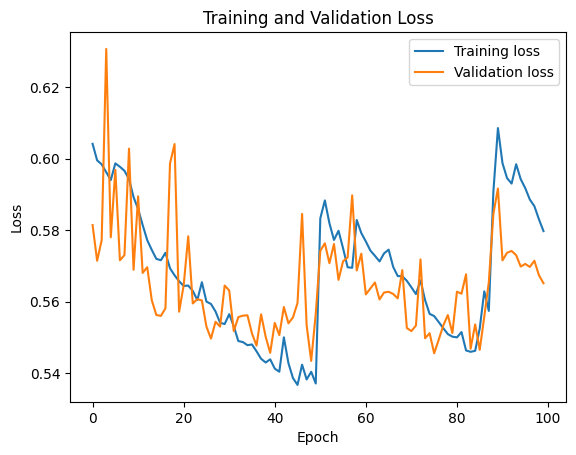

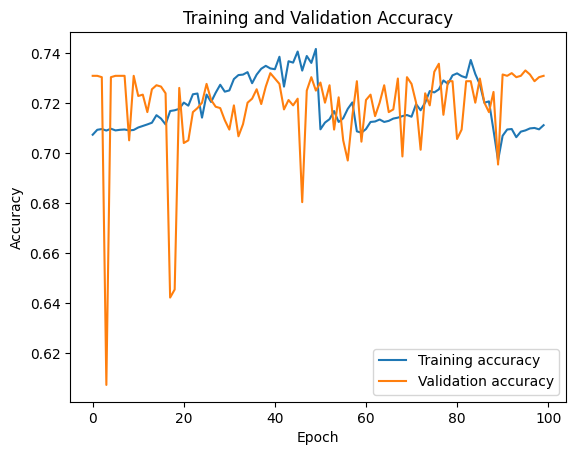

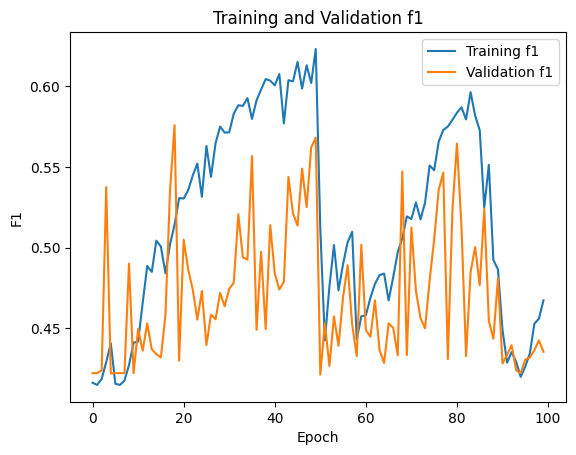

In [153]:
acc, loss, f1 = run(train_audio_loader, val_audio_loader, 64, 64, optim.NAdam, 100)
draw_learning_curve(acc, loss, f1)